In [76]:
import tensorflow as tf


In [77]:
from tensorflow import keras

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
print(tf.__version__)

2.0.0


In [80]:
fashion_mnist=keras.datasets.fashion_mnist

In [81]:
print(type(fashion_mnist))

<class 'module'>


In [82]:
# loading data sets return 4 numpy arrays

In [83]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [84]:
#images are 28 X 28 numpy arrays with pixel value ranging from 0 to 255
#labels are array of integers ranging from 0 to 9
# labels reprsent class of cloathing an image represent

In [85]:
# since class name are not included with data sets we have to store them here

In [86]:
train_images.shape

(60000, 28, 28)

In [87]:
test_images.shape

(10000, 28, 28)

In [88]:
test_labels.shape

(10000,)

In [89]:
train_labels.shape

(60000,)

In [90]:
type(train_labels)

numpy.ndarray

In [91]:
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

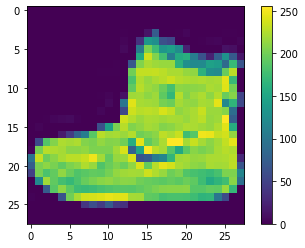

In [92]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [93]:
train_images=train_images/255.0
test_images=test_images/255.0

In [94]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneaker',"Bag","Ankle boot"]

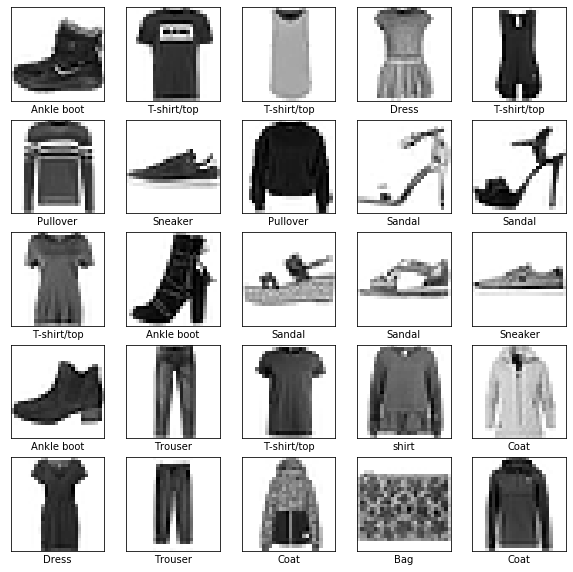

In [126]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [96]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [97]:
model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), # it donot learn but only flatten the dat
        keras.layers.Dense(128,activation=tf.nn.relu), # 1st layers has 128 neurons and relu activation fn
        keras.layers.Dense(10,activation=tf.nn.softmax) # 2nd layers has 10 neurons and softmax activation fn
       #softmax return arrays of 10 probabilities scores that sums to 1
])

In [98]:
t1=train_images.reshape(60000,-1) # convert 6000 to 28 X 28 to 6000 X 784 by merging last images

In [99]:
t1.shape

(60000, 784)

In [100]:
# here input shape is 28 X 28 and first layer flatten convert (28,28) to 784
# each node contain a score 

In [101]:
model.compile(optimizers='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [102]:
# optimizer update model on basis of data it sees and its loss function , metric monitor training and testing accuracy

In [103]:
# model . fit start the training
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.5064 - accuracy: 0.8199
Epoch 2/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3757 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3435 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3274 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3155 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3060 - accuracy: 0.8937
Epoch 7/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2993 - accuracy: 0.8966
Epoch 8/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2927 - accuracy: 0.8997
Epoch 9/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2836 - accuracy: 0.9029
Epoc

In [104]:
test_images.shape

(10000, 28, 28)

In [109]:
test_loss,test_acc = model.evaluate(test_images,test_labels)



10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy is  0.8778


In [110]:
print("Test accuracy is ",test_acc)

Test accuracy is  0.8778


In [111]:
predictions=model.predict(test_images)

In [113]:
predictions[0] # prediction represent confidence of the model for each of the article

array([3.2878023e-10, 3.7586769e-15, 8.0164504e-12, 1.9410757e-09,
       1.4684098e-13, 5.4471799e-05, 3.2822006e-10, 9.6664048e-04,
       4.1568553e-09, 9.9897897e-01], dtype=float32)

In [114]:
np.argmax(predictions[0])

9

In [117]:
test_labels[0]

9

In [122]:
print(class_names[np.argmax(predictions[0])])
print(np.argmax(predictions[0]))

Ankle boot
9


In [115]:
# we find which label has highest accuracy 

In [ ]:
#the model is most confident that imgae is ankle boot

In [121]:
print(class_names[np.argmax(predictions[1])])
print(np.argmax(predictions[1]))

Pullover
2


In [119]:
print(test_labels[1])

2

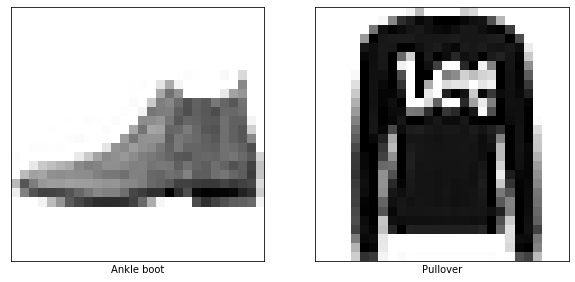

In [130]:
plt.figure(figsize=(10,10)) # total image size is 10 X 10
for i in range(2):
    plt.subplot(1,2,i+1) #first no denote indicate no of part into which to divide vertically
    #first argument denote indicate no of part into which to divide horizantly
    # third argument denote block no into which to plot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plot.show()